In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

Using TensorFlow backend.


In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()

#layer1
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='tanh',
                 input_shape=input_shape))
model.add(Dropout(0.5))

#layer2
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                108170    
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
y_train.shape

(60000, 10)

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
y_test.shape

(10000, 10)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 31s 521us/step - loss: 0.3938 - acc: 0.8873 - val_loss: 0.2818 - val_acc: 0.9205
Epoch 2/12
60000/60000 [==============================] - 31s 509us/step - loss: 0.3013 - acc: 0.9133 - val_loss: 0.2716 - val_acc: 0.9245
Epoch 3/12
60000/60000 [==============================] - 31s 524us/step - loss: 0.2949 - acc: 0.9154 - val_loss: 0.2657 - val_acc: 0.9247
Epoch 4/12
60000/60000 [==============================] - 31s 512us/step - loss: 0.2876 - acc: 0.9173 - val_loss: 0.2687 - val_acc: 0.9244
Epoch 5/12
60000/60000 [==============================] - 31s 510us/step - loss: 0.2845 - acc: 0.9187 - val_loss: 0.2693 - val_acc: 0.9210
Epoch 6/12
60000/60000 [==============================] - 30s 505us/step - loss: 0.2775 - acc: 0.9205 - val_loss: 0.2578 - val_acc: 0.9280
Epoch 7/12
6

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23098862462714315
Test accuracy: 0.9365


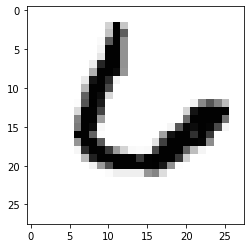

예측 결과는  [6]


In [10]:
import matplotlib.pylab as plt

n = 5221

plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('예측 결과는 ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))